RAJDEEP GHOSH
GRIP-(THE SPARK FOUNDATION)
# TASK-2: PREDICTION USING UNSUPERVISED ML

In [10]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
data = pd.read_csv("/content/drive/MyDrive/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
data.shape

(150, 6)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
data.drop(['Id'],inplace=True,axis=1)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [19]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [21]:
print(data.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [22]:
print("Number of duplicate rows: ",data.duplicated().sum())

Number of duplicate rows:  3


In [23]:
## Drop the duplicate rows

data.drop_duplicates(inplace=True)

data.shape[0]   ## gives the number of rows of the dataset

# first there were 150 rows but now they have reduced to 147

147

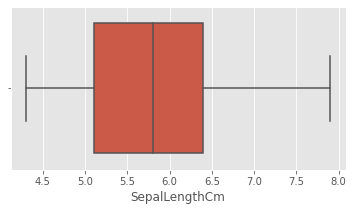

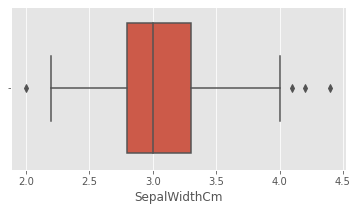

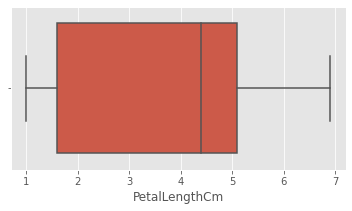

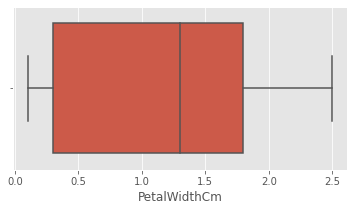

In [24]:
## Check for any outliers present in the numeric data

for i in data.columns:
    if data[i].dtype == 'float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(data[i])
        plt.show()

In [25]:
q1,q3 = np.percentile(data['SepalWidthCm'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
data['SepalWidthCm'] = data['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence
                                                 else lower_fence if x<lower_fence else x)

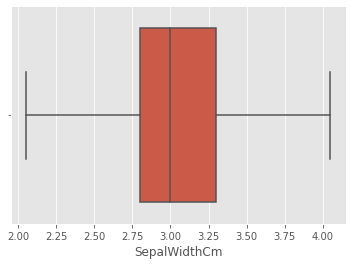

In [26]:
sns.boxplot(data['SepalWidthCm'])

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


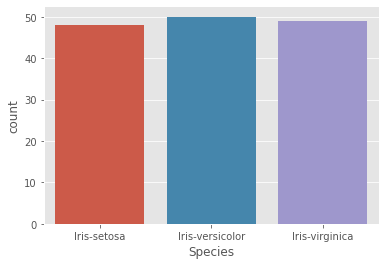

In [27]:
print(data.Species.value_counts())
sns.countplot(data['Species'])

In [28]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.052381,3.780272,1.208844
std,0.829100,0.426331,1.759111,0.757874
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


In [29]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

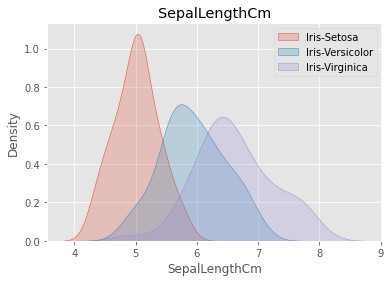

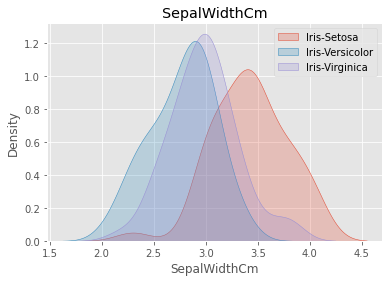

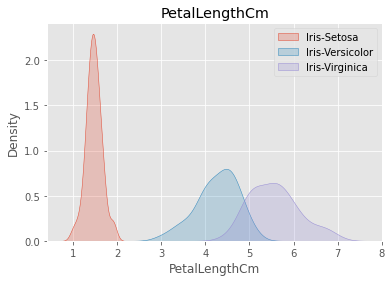

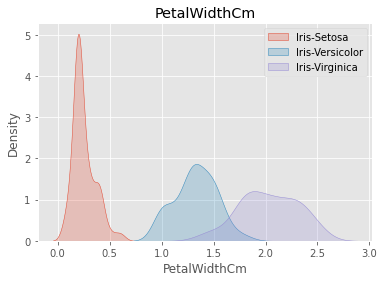

In [30]:
for i in data.columns[ :-1]:
    
    sns.kdeplot(data = data.loc[data.Species == 'Iris-setosa'][i],label="Iris-Setosa", shade=True)
    
    sns.kdeplot(data = data.loc[data.Species == 'Iris-versicolor'][i],label="Iris-Versicolor", shade=True)
    
    sns.kdeplot(data = data.loc[data.Species == 'Iris-virginica'][i],label="Iris-Virginica", shade=True)
    
    plt.legend()
    
    plt.title(i)
    
    plt.show()

In [31]:
corr= data.corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110155,0.871305,0.817058
SepalWidthCm,-0.110155,1.000000,-0.420140,-0.355139
PetalLengthCm,0.871305,-0.420140,1.000000,0.961883
PetalWidthCm,0.817058,-0.355139,0.961883,1.000000


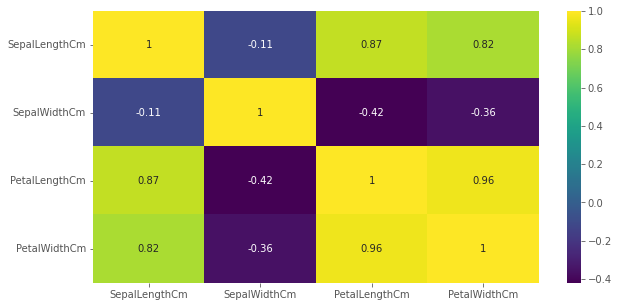

In [32]:
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='viridis')

**K-Means Clustering**

In [38]:
import sklearn
from sklearn.cluster import KMeans


In [43]:
SSE = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(data.iloc[:,[0,1,2,3]])
    SSE.append(kmeans.inertia_)

Text(0.5, 1.0, "'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K' \n")

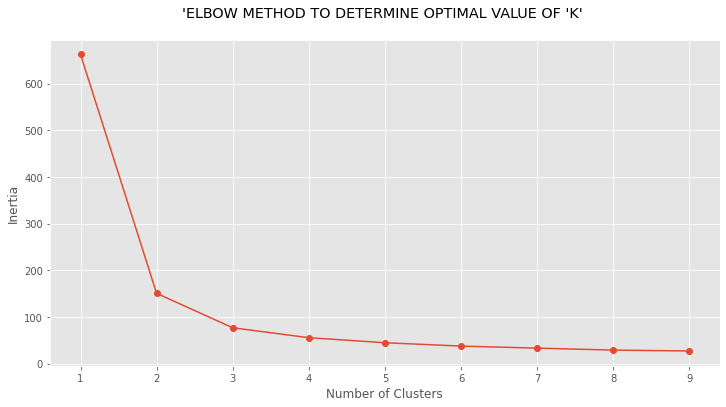

In [44]:
df = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'],df['SSE'],marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K' \n")


In [46]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(data.iloc[: ,[0,1,2,3]])
kmeans.cluster_centers_

array([[5.90327869, 2.75      , 4.38196721, 1.42622951],
       [5.01041667, 3.41979167, 1.4625    , 0.25      ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [47]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [48]:
data['cluster']=kmeans.labels_

data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [49]:
display(data['cluster'].value_counts(), data['Species'].value_counts())

0    61
1    48
2    38
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

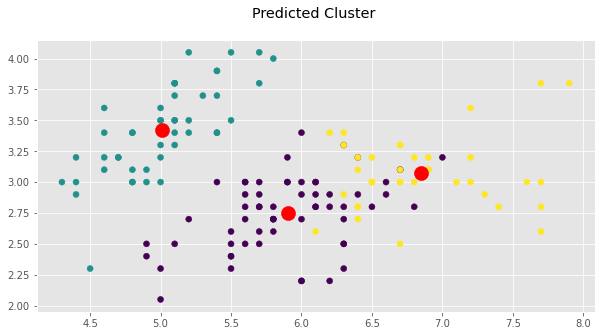

In [50]:
plt.figure(figsize=(10,5))
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=data.cluster)
plt.title("Predicted Cluster \n")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='red', label='Centroids')
plt.show()

In [51]:
data.loc[data['Species']=='Iris-setosa']['cluster'].value_counts()
## the model has identified iris-setosa with 100% accuracy

1    48
Name: cluster, dtype: int64

In [52]:
data.loc[data['Species']=='Iris-versicolor']['cluster'].value_counts()

0    48
2     2
Name: cluster, dtype: int64

In [53]:
data.loc[data['Species']=='Iris-virginica']['cluster'].value_counts()

2    36
0    13
Name: cluster, dtype: int64

In [54]:
data['Species-encoded'] = data['Species'].apply(lambda x : 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species-encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [55]:
from sklearn.metrics import classification_report
print(classification_report(data['Species-encoded'],data['cluster']))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86        50
           1       1.00      1.00      1.00        48
           2       0.95      0.73      0.83        49

    accuracy                           0.90       147
   macro avg       0.91      0.90      0.90       147
weighted avg       0.91      0.90      0.90       147



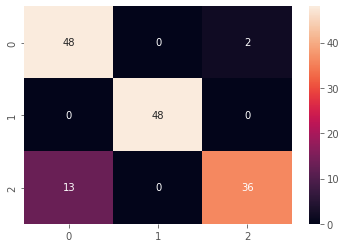

In [56]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(data['Species-encoded'],data['cluster']),annot=True)